# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into the notebook.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [160]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
import warnings
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA

In [96]:
# Set the notebook default settings
warnings.filterwarnings('ignore')
sns.set_theme() #theme
plt.rcParams['figure.figsize'] = [15, 15]
red_green = LinearSegmentedColormap.from_list('custom_red_green', ['red', 'green'], N=256)


In [5]:
# load dataset
EDA_df = pd.read_csv('../Data/Wholesale_Data.csv')

**Get an overview of the dataframe**

In [6]:
# get an overview of the dataframe
EDA_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
EDA_df.shape

(440, 8)

In [8]:
# drop duplicate rows
EDA_df = EDA_df.drop_duplicates()

In [9]:
EDA_df.shape

(440, 8)

In [10]:
EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 30.9 KB


In [11]:
EDA_df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [12]:
EDA_df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

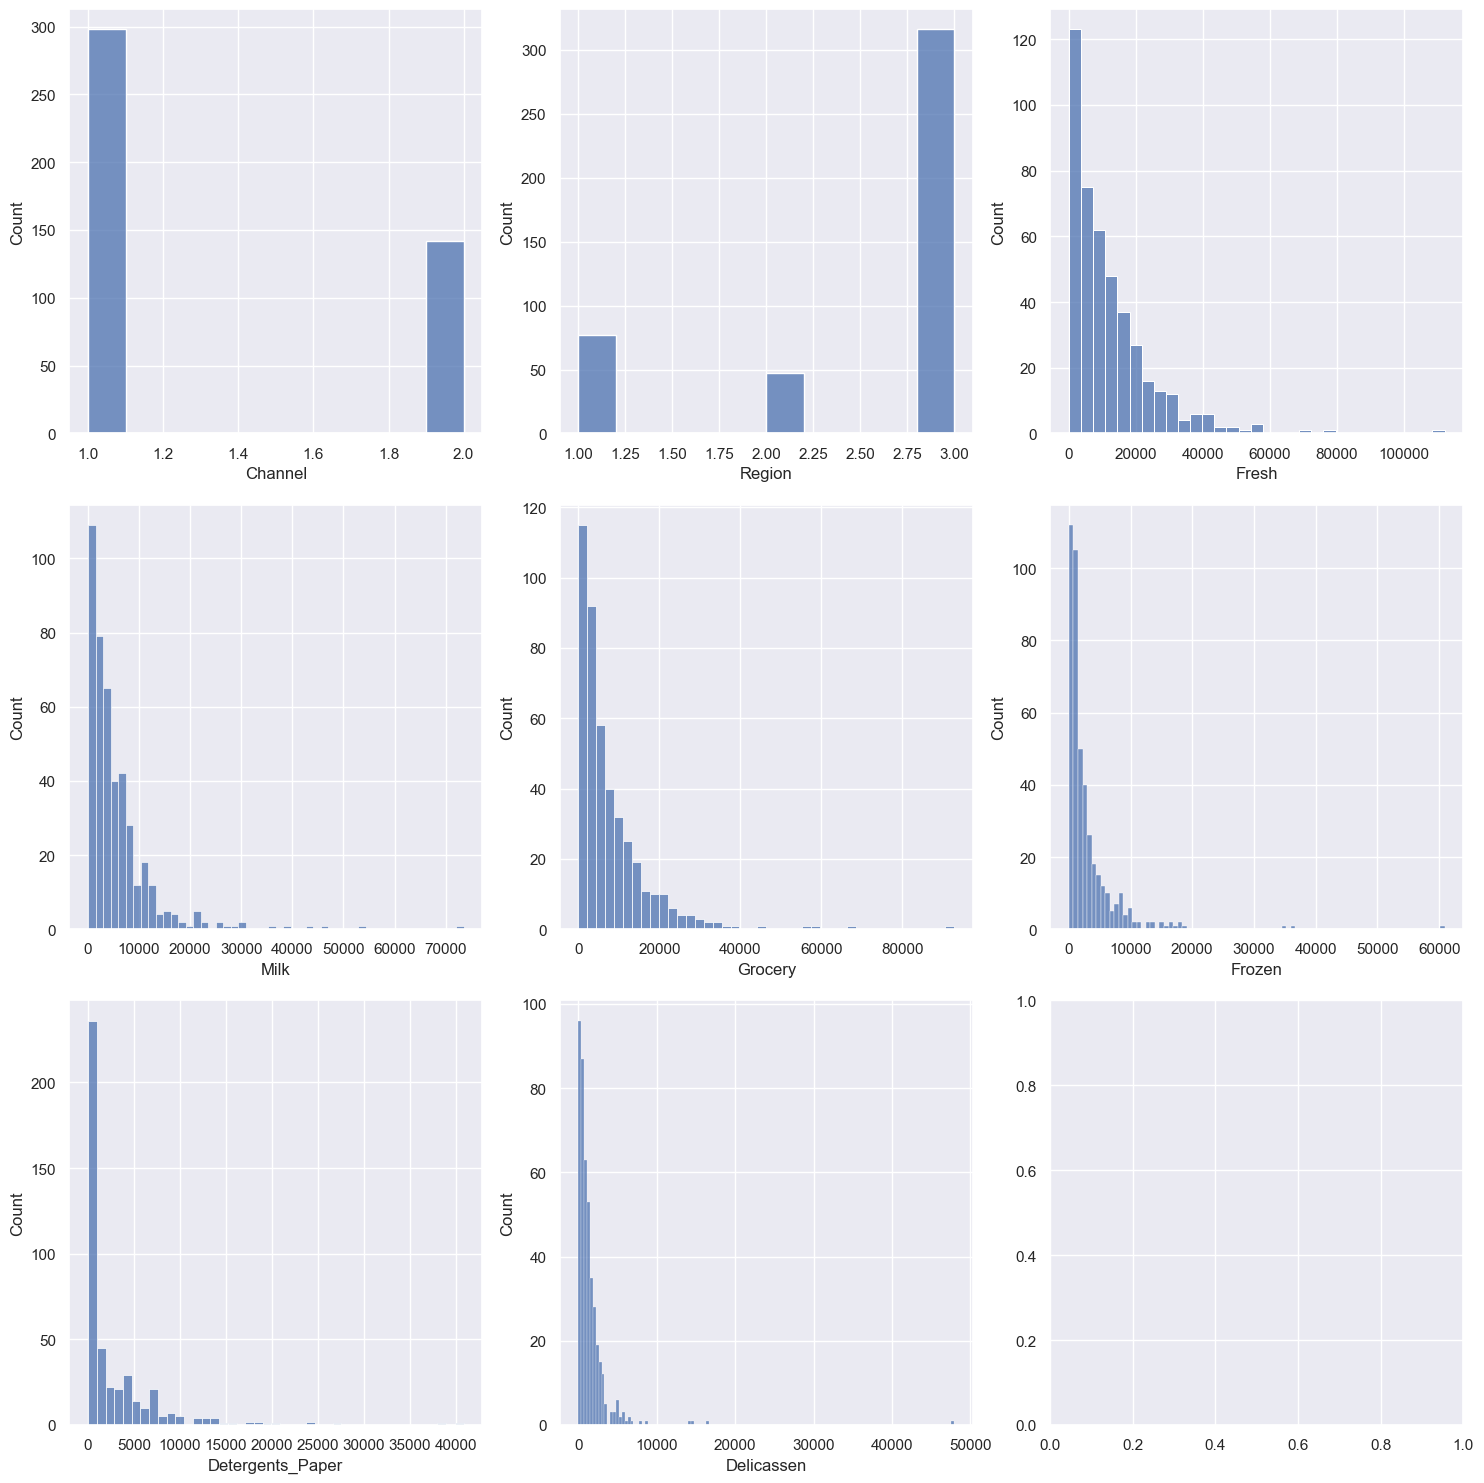

In [13]:
fig, axs = plt.subplots(3, 3)

for ax, column in zip(axs.ravel(), EDA_df.columns):
    sns.histplot(EDA_df[column], ax=ax)
    #ax.set_title(column)
    #ax.set_ylabel('')

plt.tight_layout()
plt.show()

**Observations**
* The features `Channel`and `Region` are nominal categorical variables and should be encoded as such
* This is a small dataset showing the monetary value of 6 products bought by 440 clients in a given year
* `Channel` 1 and `Region` 3 are the most popular channel and region for sales respectively
* Since the 6 features of `Fresh`, `Milk`,`Grocery`,`Frozen`,`Detergents_Paper`, and `Delicassen` are represented as monetary units, they are all numerical variables
* No feature has a value that is encoded as null. However, from the distributions above, it might be necessary to check if missing values are instead encoded as zeros

In [14]:
cat_columns = ['Channel','Region']
numeric_columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

In [15]:
# Using the appropriate datatype for the nominal categorical columns
EDA_df[cat_columns] = EDA_df[cat_columns].astype('category')

In [16]:
EDA_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 25.2 KB


In [17]:
EDA_df[numeric_columns].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [18]:
EDA_df[cat_columns].describe()

,Channel,Region
count,440,440
unique,2,3
top,1,3
freq,298,316


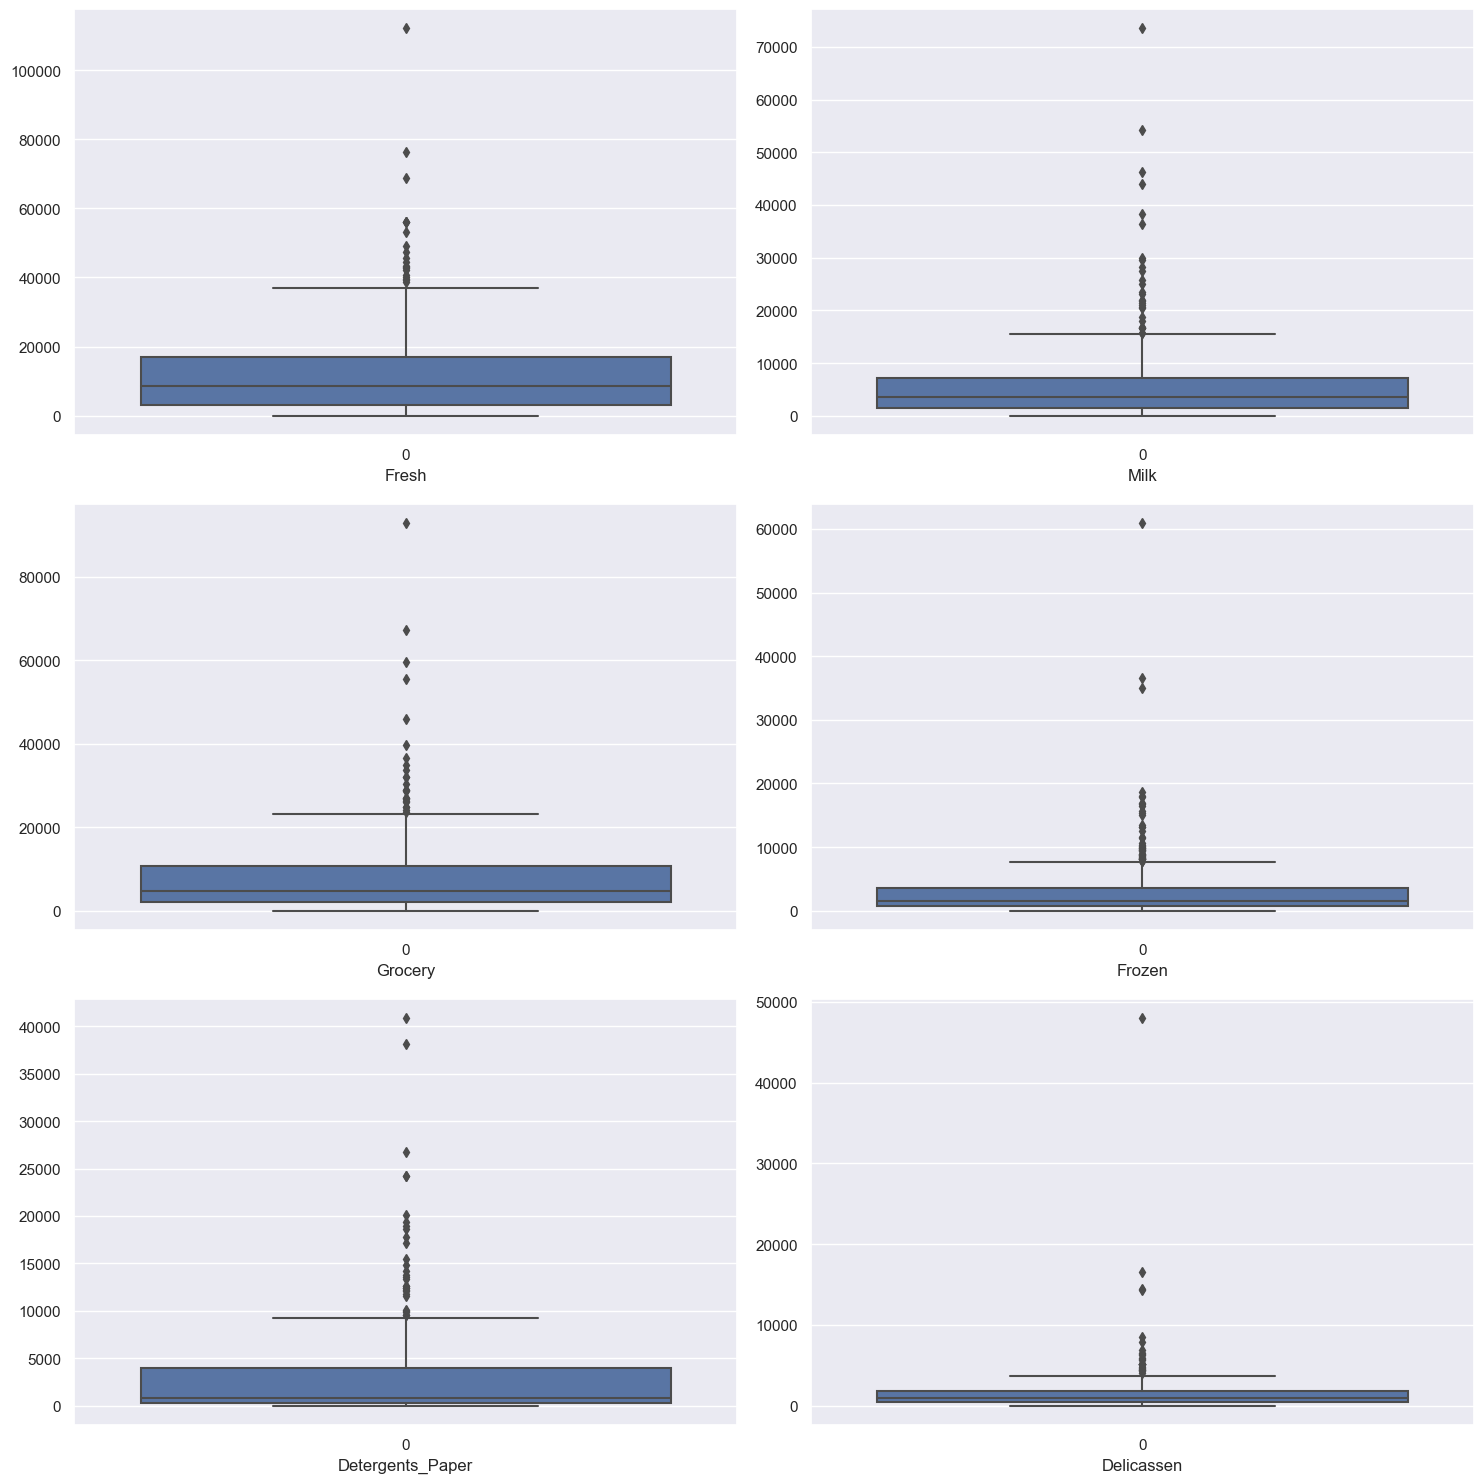

In [19]:
fig, axs = plt.subplots(3, 2)

for ax, column in zip(axs.ravel(), EDA_df.select_dtypes(include=['number']).columns):
    sns.boxplot(EDA_df[column], ax=ax)
    #ax.set_title(column)
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

**Observations**
* No values are encoded as zero. The dataset seems relatively clean
* There are obvious outliers in all numeric columns
* The sales features all seem extremely right-skewed, hence it will be advisable to impute with the median for any subsequent processing, if needed
* Additionally, standard scaling of this dataset will be required to improve numerical conditioning and reduce sensitivity to outliers

We will proceed with the rest of the EDA and will start by examining the numeric features within the context of the 
two nominal categorical features

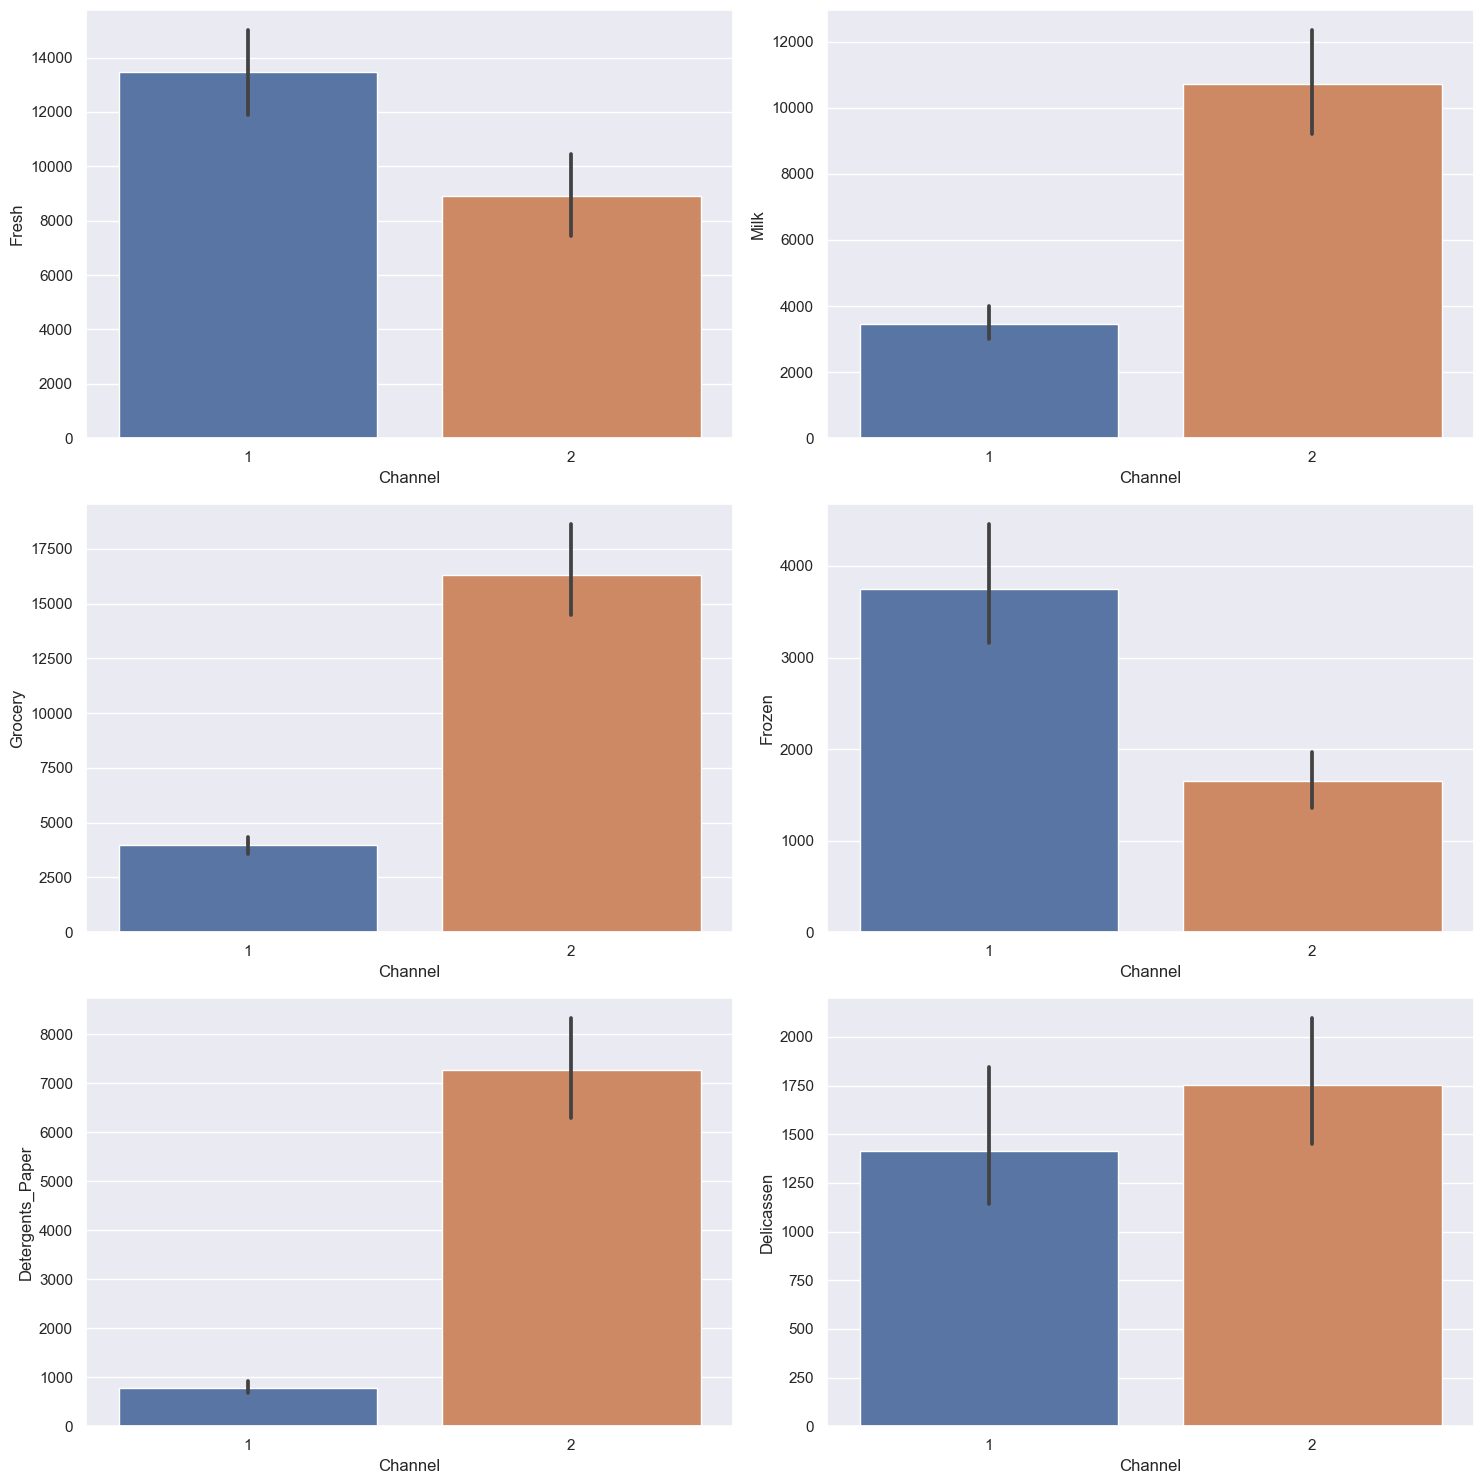

In [20]:
fig, axs = plt.subplots(3, 2)

for ax, column in zip(axs.ravel(), numeric_columns):
    if column != 'Outcome':
        sns.barplot(data=EDA_df, x='Channel',y=column,ax=ax)
        #ax.set_title(column)
        #ax.set_ylabel('')

plt.tight_layout()
plt.show()


**Observation(s)**
* Despite channel 1 being the most popular in the dataset, there are obvious products, such as `Grocery` and `Detergent_Paper`, where channel 2 has the most sales.

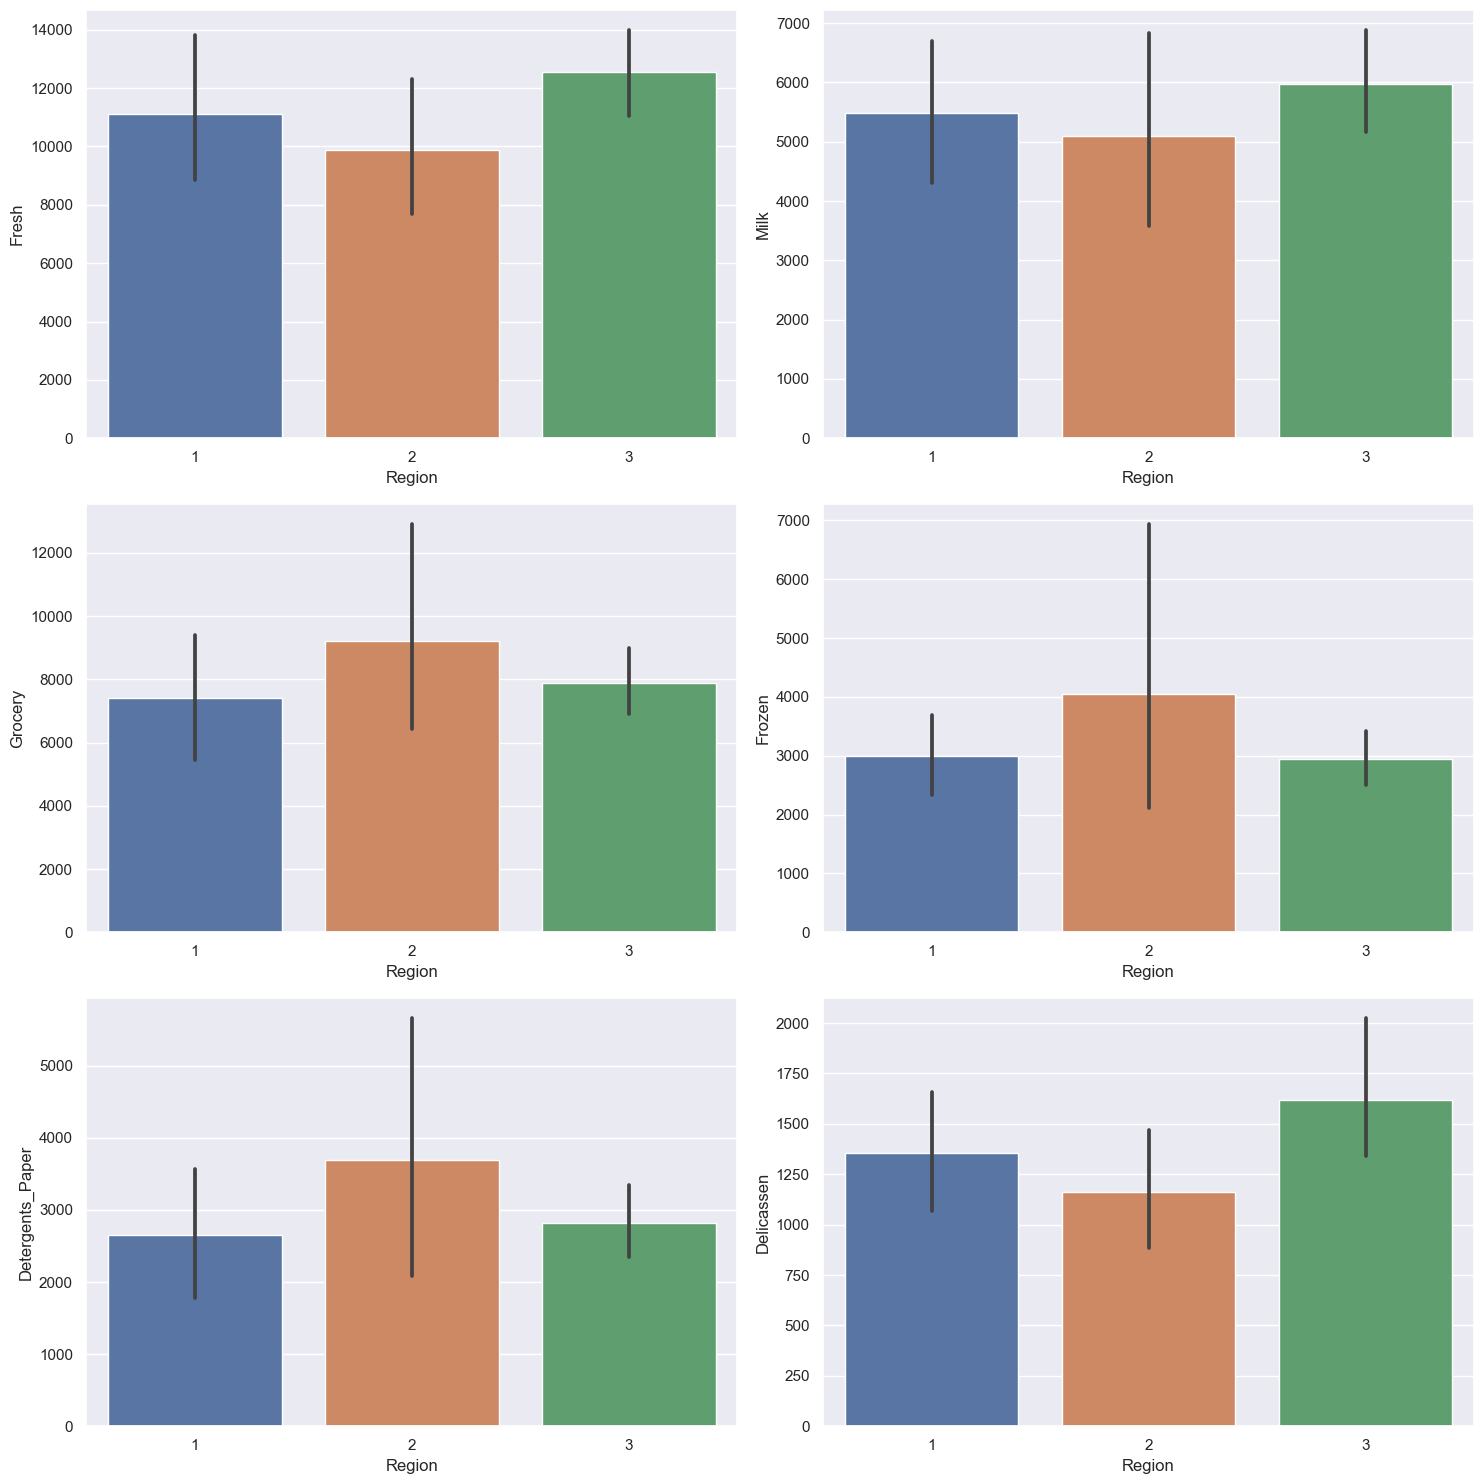

In [21]:
fig, axs = plt.subplots(3, 2)

for ax, column in zip(axs.ravel(), numeric_columns):
    if column != 'Outcome':
        sns.barplot(data=EDA_df, x='Region',y=column,ax=ax)
        #ax.set_title(column)
        #ax.set_ylabel('')

plt.tight_layout()
plt.show()

**Observation(s)**
* Accounting for the confidence intervals, the variation in sales across regions is not as obvious as in the `Channel`
dispersion

Having checked the variations in averages, we can proceed to checking the variation in the distributions via violin plots

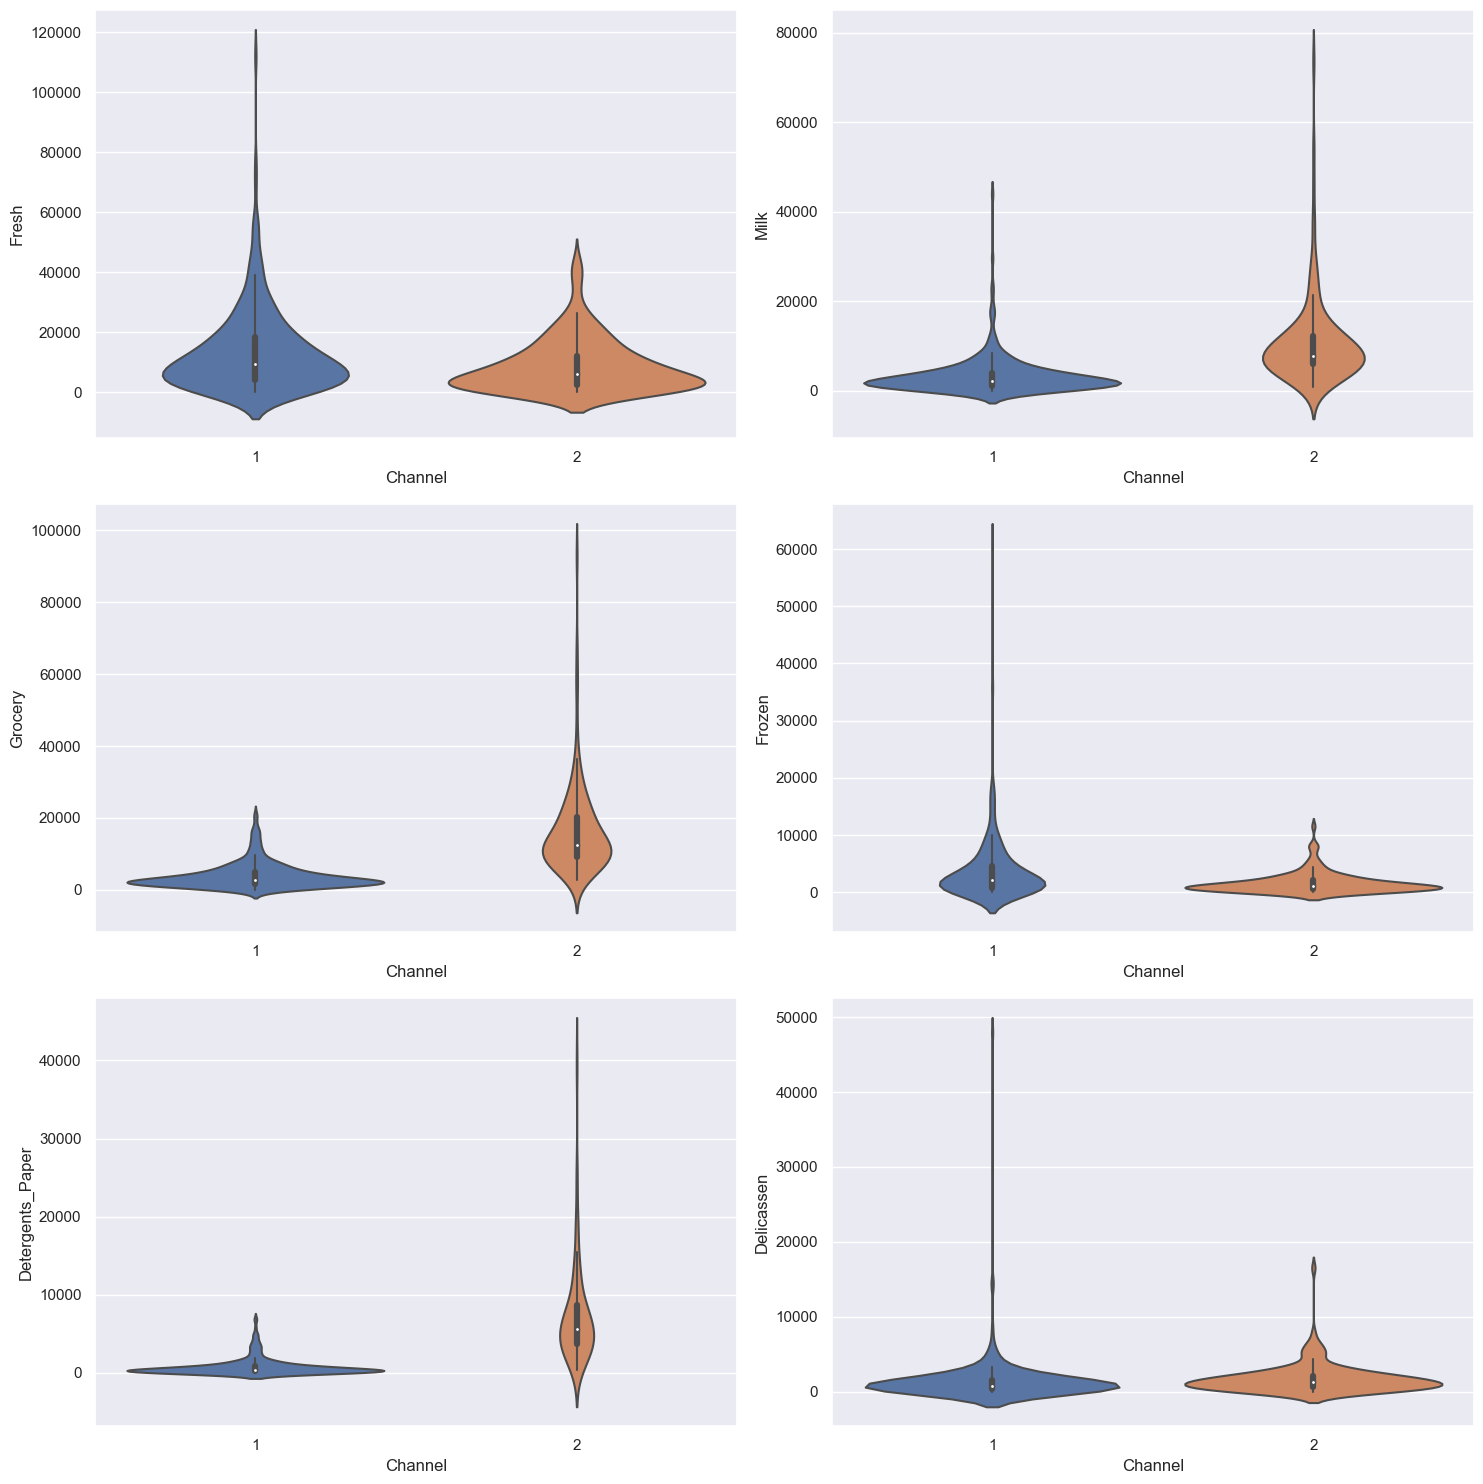

In [22]:
fig, axs = plt.subplots(3, 2)

for ax, column in zip(axs.ravel(), numeric_columns):
        sns.violinplot(data=EDA_df, x='Channel', y=column, ax=ax)
        #sns.barplot(data=EDA_df, x='Outcome',y=column,ax=ax)
        #ax.set_title(column)
        #ax.set_ylabel('')

plt.tight_layout()
plt.show()

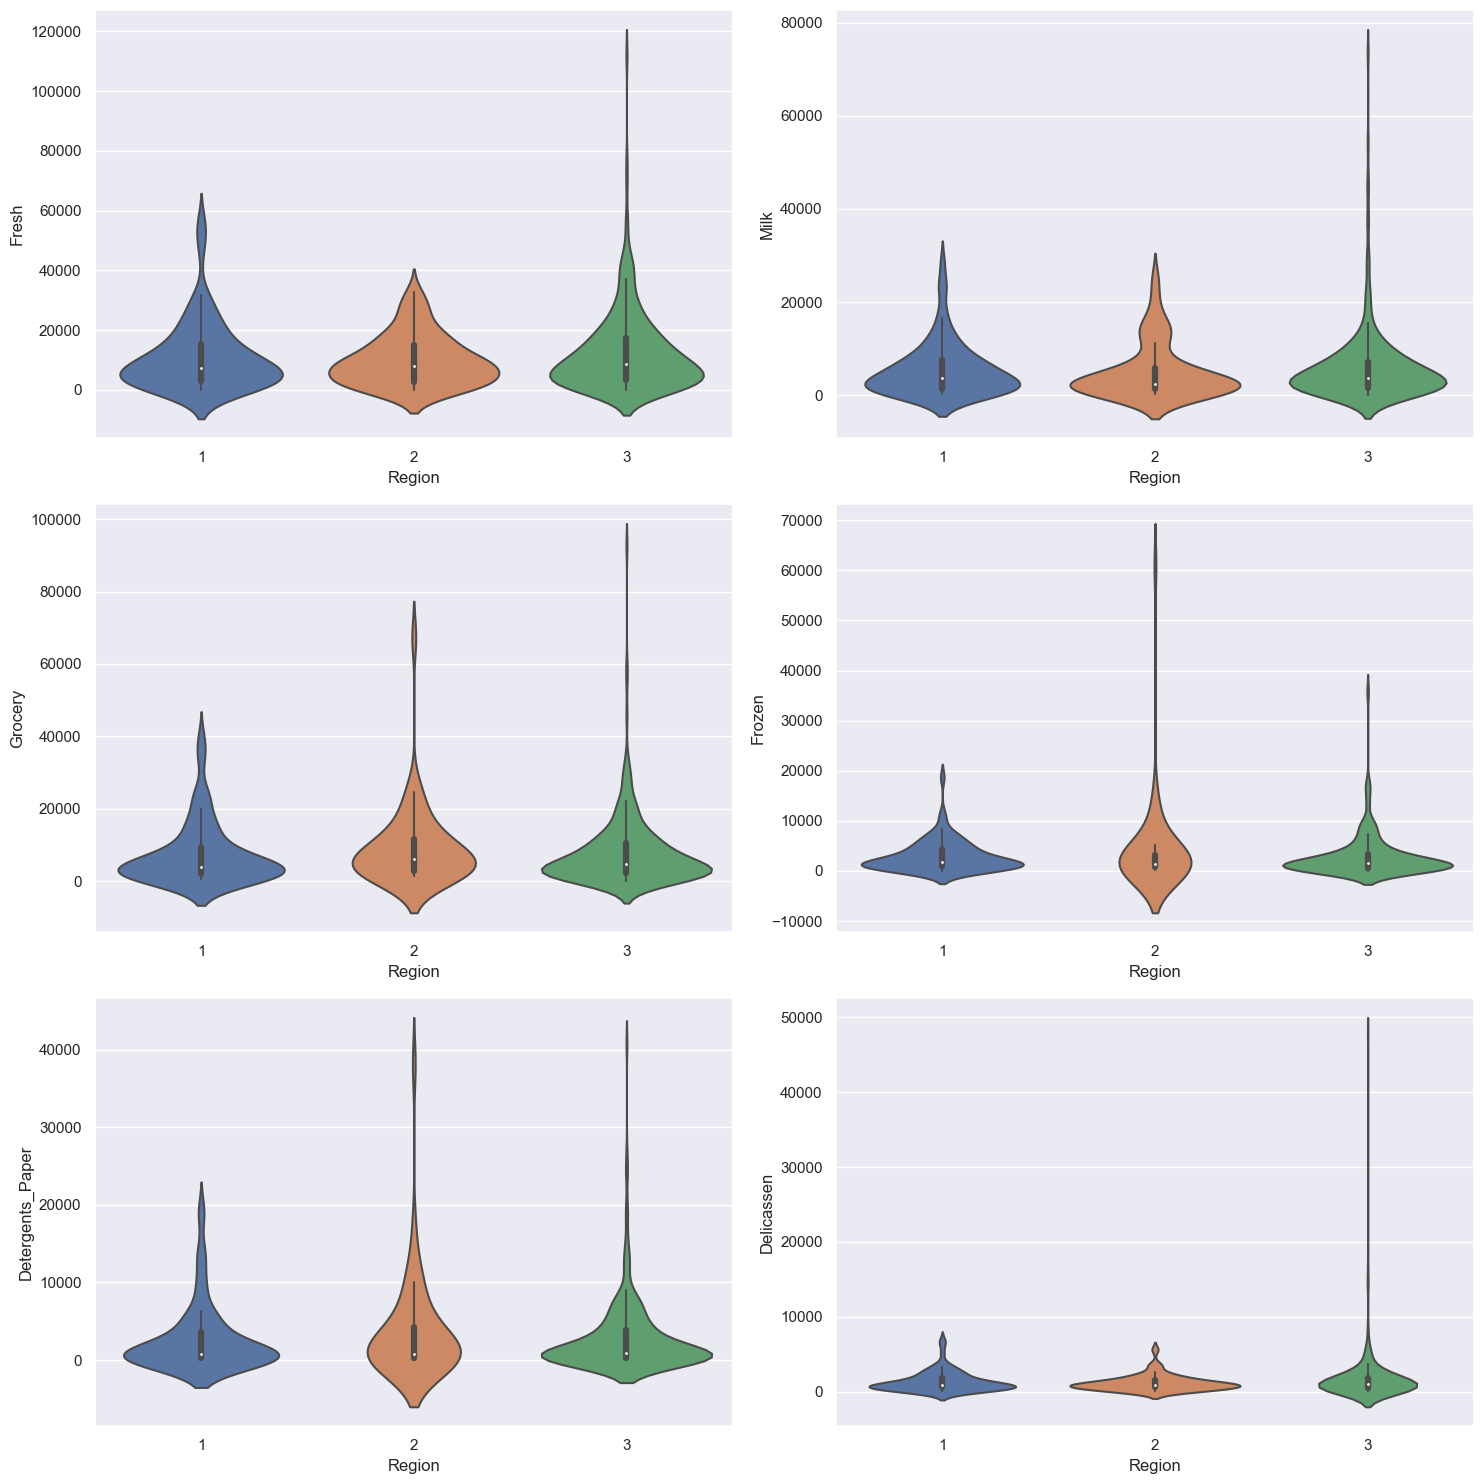

In [23]:
fig, axs = plt.subplots(3, 2)

for ax, column in zip(axs.ravel(), numeric_columns):
        sns.violinplot(data=EDA_df, x='Region', y=column, ax=ax)
        #sns.barplot(data=EDA_df, x='Outcome',y=column,ax=ax)
        #ax.set_title(column)
        #ax.set_ylabel('')

plt.tight_layout()
plt.show()

**Observation(s)**
* There seems to be evident variations in the distributions across nominal categories, showing the potential
disproportionate effect of outliers

We will proceed to investigate the correlation between the sales of products in the numeric features. Since these features contain significant outliers and their distributions appear to be not normally distributed, we will use the Spearman's rank correlation.

In [24]:
EDA_df[numeric_columns].corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


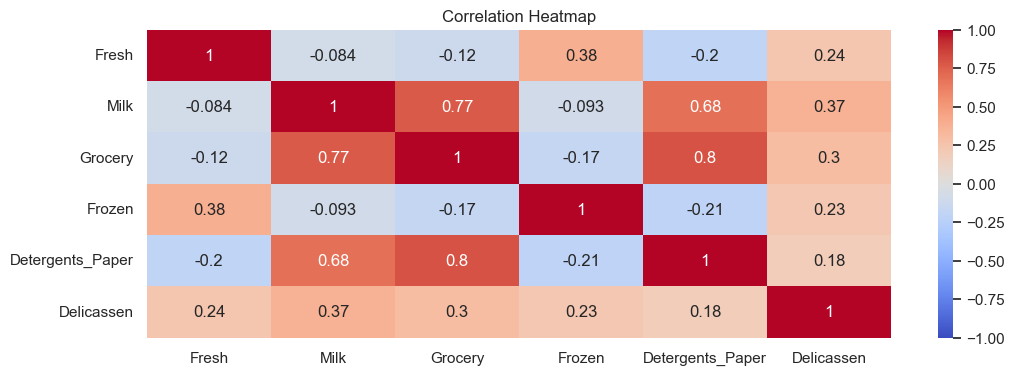

In [25]:
# Calculate correlation matrix
corr = EDA_df[numeric_columns].corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(12,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Observation(s)**
* As expected, the sales `Milk`, `Detergents_Paper` and `Groceries` seem highly correlated. 
* It would be interesting to see this similarity uncovered by the unsupervised learning algorithms

I do not believe feature selection makes sense in this context. The features are few and the objective is to
identify groupings within the products. A feature having more variance or dispersion in its sales compared to the others does not seem to be relevant for this purpose.

Next, we proceed to build a pipeline for the preprocessing tasks required for the rest of this project

In [26]:
# build a preprocessing pipeline to be used for the rest of the analysis

class ConvertToCategorical(BaseEstimator, TransformerMixin):
    def __init__(self, column_names):
        self.column_names = column_names
    
    def fit(self, X, y=None):
        # No fitting necessary, so just return self
        return self

    def transform(self, X):
        # Convert specified columns to categorical
        for col in self.column_names:
            X[col] = X[col].astype('category')
        return X

# Initialize the custom transformer
convert_to_categorical = ConvertToCategorical(column_names=cat_columns)

# Define the pipeline for numerical data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())                    # Then scale the data
])

# Pipeline for categorical data
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode (most frequent)
    ('encoder', OneHotEncoder(drop='first'))                           # Then apply OneHotEncoder
])

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_columns),   # Use the num_pipeline for numerical columns
        ('cat', cat_pipeline, cat_columns)  # Use the cat_pipeline for categorical columns
    ])

full_pipeline = Pipeline([
    ('convert_categorical', convert_to_categorical),
    ('preprocessor', preprocessor)
])

In [27]:
# Function to get feature names from ColumnTransformer
def get_feature_names(column_transformer):
    feature_names = []

    # Iterate through all transformers in the ColumnTransformer
    for transformer_name, transformer, original_features in column_transformer.transformers_:
        if transformer_name == 'remainder':
            # Skip 'remainder'
            continue

        if isinstance(transformer, Pipeline):
            # If the transformer is a pipeline, then use the last step of the pipeline
            transformer = transformer.steps[-1][1]

        if hasattr(transformer, 'get_feature_names_out'):
            # If the transformer has a 'get_feature_names_out' method, use it
            transformer_feature_names = transformer.get_feature_names_out(original_features)
        else:
            # Otherwise, use the original feature names
            transformer_feature_names = original_features

        feature_names.extend(transformer_feature_names)

    return feature_names


The above pipeline include the automatic conversion of the categorical features data type. Let's test our pipeline

In [28]:
# Reload dataset
raw_df = pd.read_csv('../Data/Wholesale_Data.csv')

In [29]:
# Remove outliers
# Calculate Q1, Q3, and IQR only for numerical columns
Q1 = raw_df[numeric_columns].quantile(0.25)
Q3 = raw_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with NaN
df_with_nan_outliers = raw_df.copy()
for col in numeric_columns:
    df_with_nan_outliers[col] = df_with_nan_outliers[col].mask(
        (df_with_nan_outliers[col] < lower_bound[col]) | 
        (df_with_nan_outliers[col] > upper_bound[col]), 
        np.nan
    )

In [39]:
df_with_nan_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           440 non-null    int64  
 1   Region            440 non-null    int64  
 2   Fresh             420 non-null    float64
 3   Milk              412 non-null    float64
 4   Grocery           416 non-null    float64
 5   Frozen            397 non-null    float64
 6   Detergents_Paper  410 non-null    float64
 7   Delicassen        413 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 27.6 KB


In [40]:
raw_df = df_with_nan_outliers.copy()

In [41]:
# Fit the preprocessor to your data
full_pipeline.fit(raw_df)

Pipeline(steps=[('convert_categorical',
                 ConvertToCategorical(column_names=['Channel', 'Region'])),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Fresh', 'Milk', 'Grocery',
                                                   'Frozen', 'Detergents_Paper',
                                                   'Delicassen']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Channel', 'Region'])]))])

In [42]:
# Access the ColumnTransformer within the full pipeline
column_transformer = full_pipeline.named_steps['preprocessor']

In [43]:
# Now use the get_feature_names function on the ColumnTransformer
feature_names = get_feature_names(column_transformer)

In [44]:
feature_names

['Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen',
 'Channel_2',
 'Region_2',
 'Region_3']

In [45]:
# Transform data using the full pipeline
transformed_data = full_pipeline.transform(raw_df)

In [46]:
# Create a DataFrame from the transformed data
transformed_df = pd.DataFrame(transformed_data, columns=feature_names, index=raw_df.index)

In [47]:
transformed_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3
0,0.315503,1.584861,0.254488,-0.988337,0.387277,0.310923,1.0,0.0,1.0
1,-0.348852,1.630115,0.630430,-0.066620,0.661355,0.831650,1.0,0.0,1.0
2,-0.432192,1.335667,0.277528,0.316238,0.760094,-0.283514,1.0,0.0,1.0
3,0.386058,-0.901205,-0.371145,2.697340,-0.572216,0.845917,0.0,0.0,1.0
4,1.492922,0.337126,0.186493,1.215329,-0.009892,-0.283514,1.0,0.0,1.0


In [48]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fresh             440 non-null    float64
 1   Milk              440 non-null    float64
 2   Grocery           440 non-null    float64
 3   Frozen            440 non-null    float64
 4   Detergents_Paper  440 non-null    float64
 5   Delicassen        440 non-null    float64
 6   Channel_2         440 non-null    float64
 7   Region_2          440 non-null    float64
 8   Region_3          440 non-null    float64
dtypes: float64(9)
memory usage: 31.1 KB


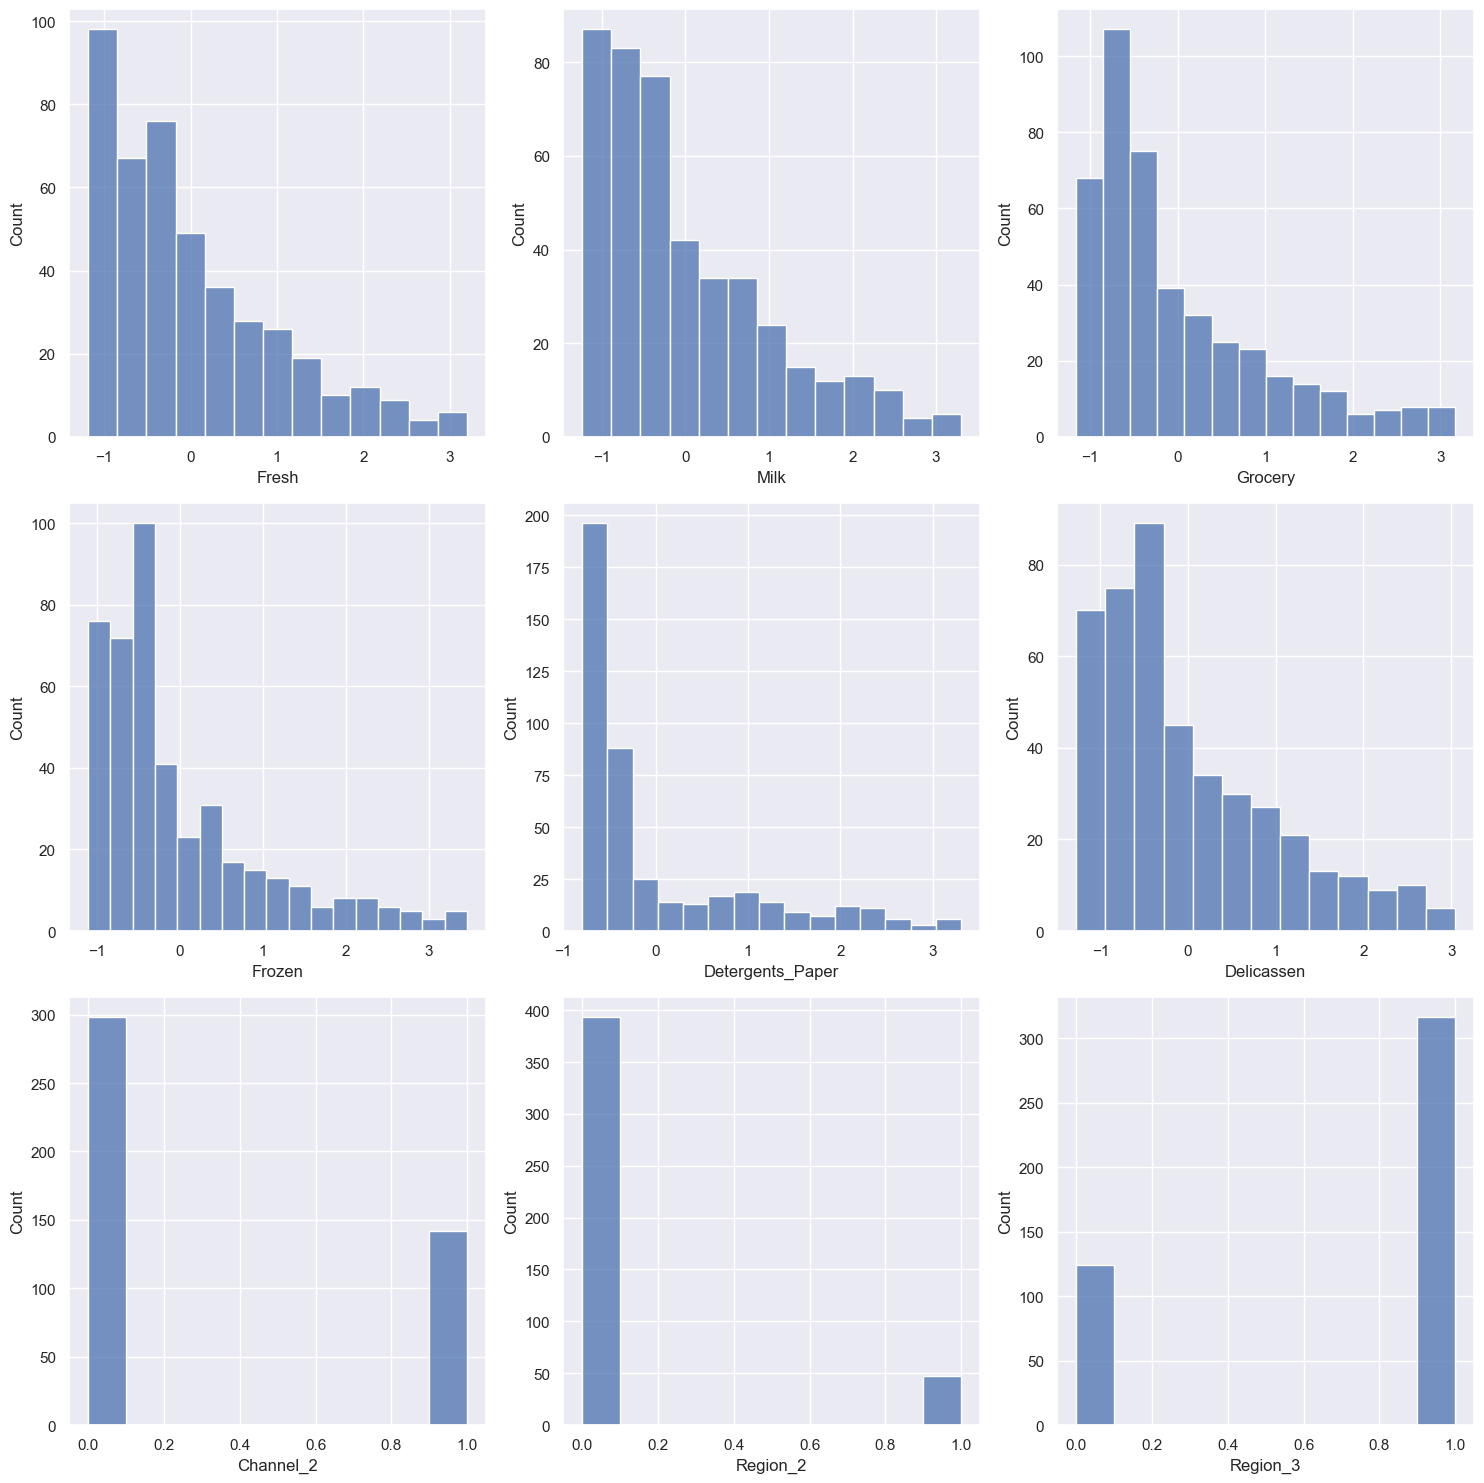

In [49]:
fig, axs = plt.subplots(3, 3)

for ax, column in zip(axs.ravel(), transformed_df.columns):
    sns.histplot(transformed_df[column], ax=ax)
    #ax.set_title(column)
    #ax.set_ylabel('')

plt.tight_layout()
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

If we are interested in just the products, we should deal with only a subset of the features

In [50]:
# focus on the products
df = transformed_df[numeric_columns]

**Determining the optimal number of clusters**

In [68]:
# distortion plot for selecting optimal number of clusters
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
    plt.figure(figsize=(8,5))
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

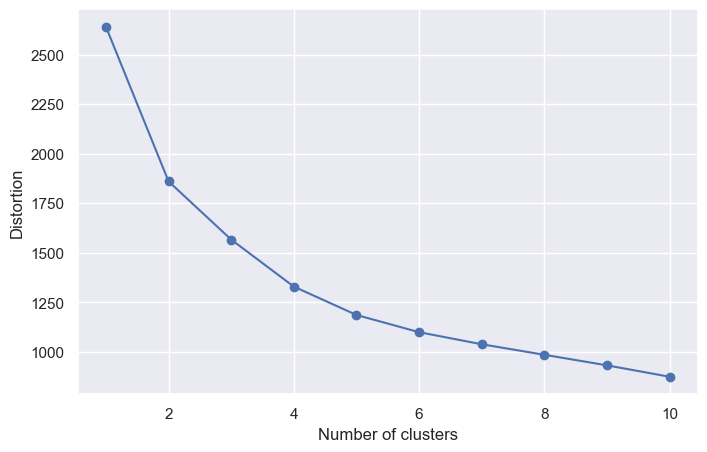

In [69]:
# elbow rule
plot_distortion(df,max_clusters=10)

From the plot we can see that the optimal number of clusters could be 4 or 5, using the elbow rule

**Fit the model**

In [72]:
km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(df)

In [91]:
EDA_df_original = EDA_df.copy()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Fresh             440 non-null    int64   
 1   Milk              440 non-null    int64   
 2   Grocery           440 non-null    int64   
 3   Frozen            440 non-null    int64   
 4   Detergents_Paper  440 non-null    int64   
 5   Delicassen        440 non-null    int64   
 6   Cluster           440 non-null    category
dtypes: category(1), int64(6)
memory usage: 40.9 KB


In [104]:
def plot_clusters (y_km):
    eval_df = EDA_df.copy()
    eval_df['Cluster'] = y_km
    eval_df['Cluster']= eval_df['Cluster'].astype('category')
    eval_df.drop(['Channel','Region'],axis=1,inplace=True)
    # Group by the 'Cluster' column and calculate the mean for each product
    cluster_means = eval_df.groupby('Cluster').median()/1e3

    # Transpose the resulting DataFrame so that products become rows and clusters become columns
    cluster_means = cluster_means.T

    plt.figure(figsize=(15, 6))
    sns.heatmap(cluster_means, annot=True, cmap=red_green)
    plt.title('Median Sales Value of Products by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Product')
    plt.show()

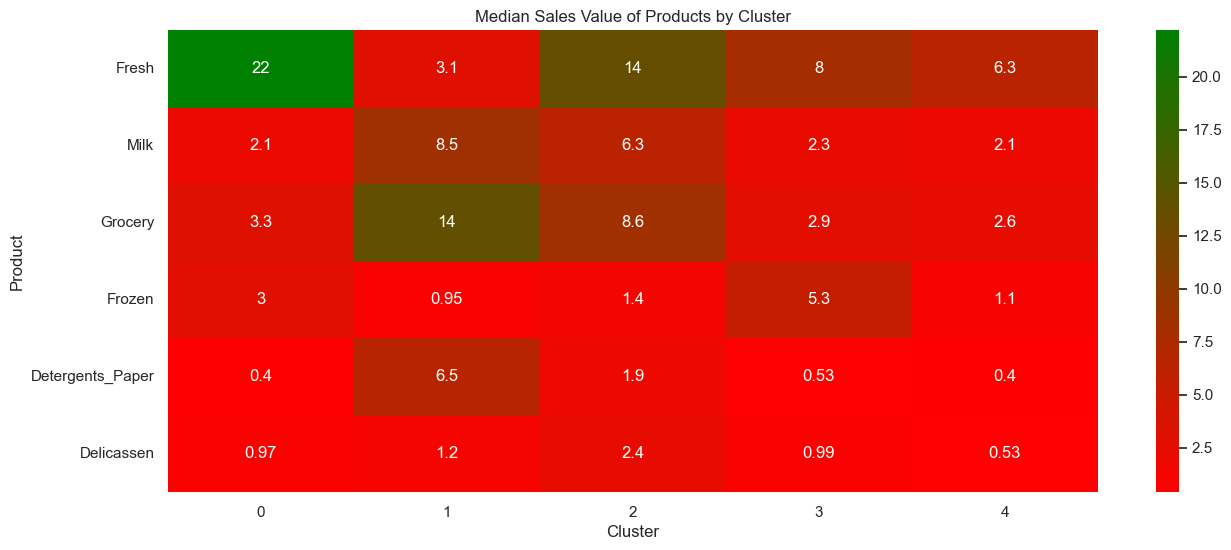

In [105]:
plot_clusters(y_km)

**Observations**
* Cluster 0 is distinguished by a significantly higher purchase volume in `Fresh`, indicating these clients likely prioritize fresh produce.
* Cluster 1 features the most diverse set of purchases with relatively high sales in `Milk`, `Grocery`, and `Detergents_Paper`, suggesting these clients may be small retailers or grocery stores.
* Cluster 2 has moderate purchasing volumes across most product categories but is notably less for `Fresh` and `Frozen`, possibly representing smaller households or clients with limited storage.
* Cluster 3 shows a preference for `Frozen` products and relatively lower median sales in other categories, which might indicate clients like cafes or small eateries that use more frozen goods.
* Cluster 4 has the lowest median sales across all product categories, which could imply these are clients with low purchasing volumes, such as small, independent buyers.

Let us repeat this for n_clusters =  4

In [106]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(df)

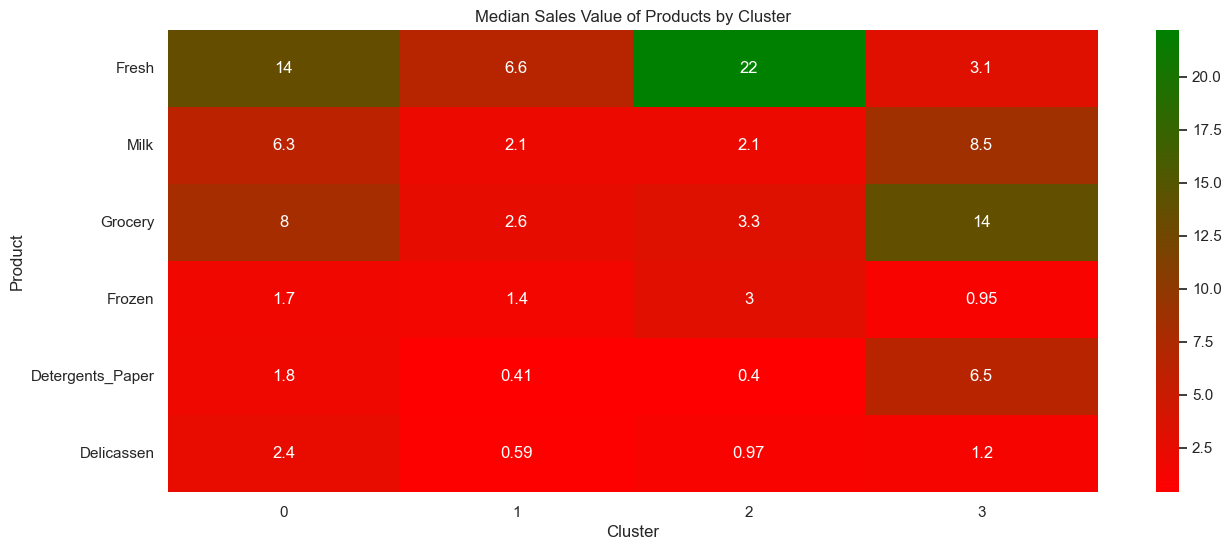

In [107]:
plot_clusters(y_km)

The observation seem similar to the one above. Let us now tune the kmeans design using objective measures like the silhoutte score to attempt picking the optimal clustering hyperparameters

In [119]:
# Add the KMeans estimator to the end of your pipeline
pipeline = Pipeline([
    ('processor', full_pipeline),
    ('kmeans', KMeans(random_state=42))
])

# Define the parameter grid
param_grid = {
    'processor__preprocessor__num__imputer__strategy': ['mean', 'median'],
    'processor__preprocessor__num__scaler__with_mean': [True, False],
    'kmeans__n_clusters': range(2, 7),  # cluster range
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__n_init': [10, 15, 20]
}

# Create a list of all parameter combinations
grid = list(ParameterGrid(param_grid))

# Placeholder for the best silhouette score and the best hyperparameters
best_score = -1
best_params = None

# for the feature set
for params in grid:
    # Set parameters
    pipeline.set_params(**params)
    
    # Fit the pipeline
    pipeline.fit(raw_df)
    
    # Get the cluster labels
    cluster_labels = pipeline.named_steps['kmeans'].labels_
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(pipeline[:-1].transform(raw_df), cluster_labels)
    
    # Check if this is the best score so far
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_params = params

print(f'Best Silhouette Score: {best_score}')
print(f'Best Parameters: {best_params}')

Best Silhouette Score: 0.3137406591551239
Best Parameters: {'kmeans__init': 'k-means++', 'kmeans__n_clusters': 2, 'kmeans__n_init': 10, 'processor__preprocessor__num__imputer__strategy': 'mean', 'processor__preprocessor__num__scaler__with_mean': True}


In [120]:
pipeline.set_params(**best_params)
y_km = pipeline.fit_predict(raw_df)

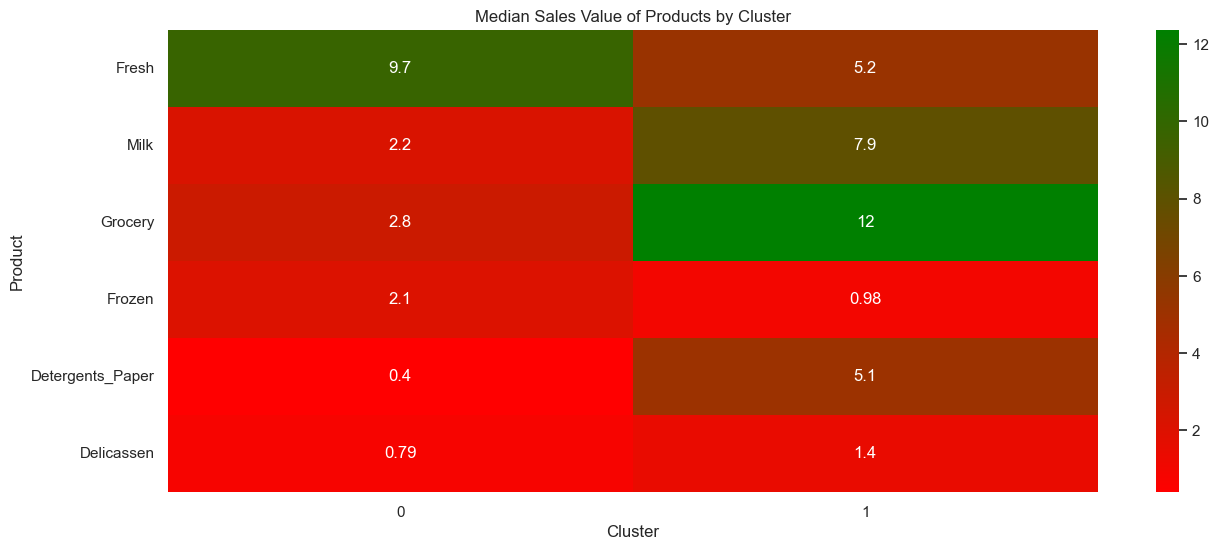

In [122]:
plot_clusters(y_km)

**Observations**
* Using the silhouette score, which measures, how similar a sample is to its own cluster compared to other clusters, we were able to get 2 clusters as the ideal number
* With this new setting, the interpretation is that the clients form two distinct clusters, with cluster 0 preferring mostly `Fresh` produce and the other cluster being more balanced but also favouring the `Milk`,`Grocery`, and `Detergents_Paper` products

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [140]:
pipeline = Pipeline([
    ('processor', full_pipeline),
    ('hierarchical', AgglomerativeClustering(affinity='euclidean',
                                             linkage = 'ward',
                                             n_clusters = 2
                                            ))
])

In [141]:
y_km = pipeline.fit_predict(raw_df)

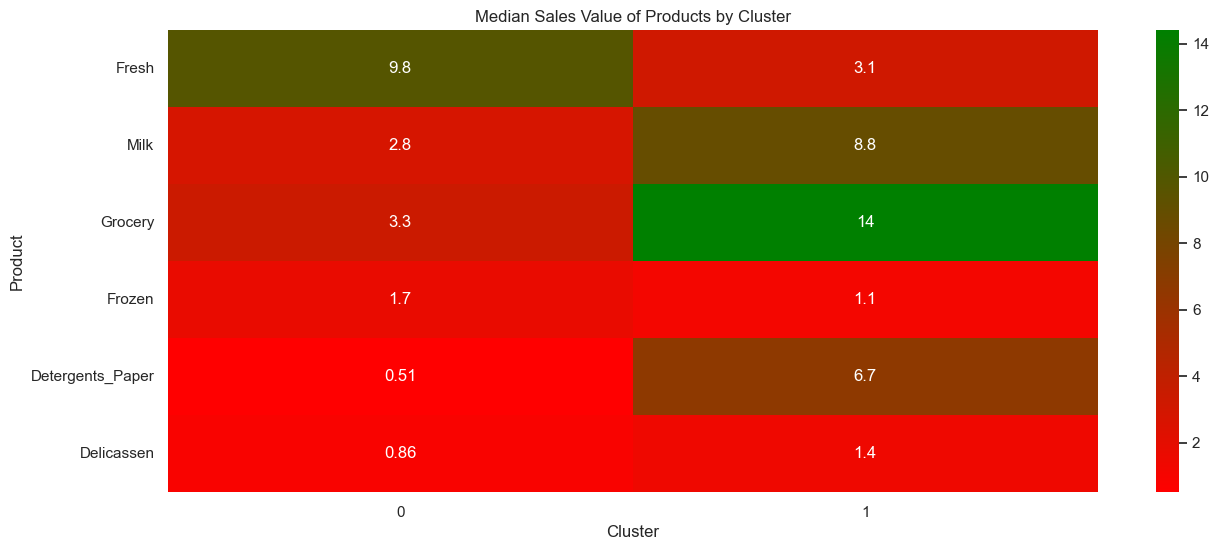

In [142]:
plot_clusters(y_km)

In [158]:
# define plot_dendrogram function
def plot_dendrogram(raw_df,method ='ward'):
    plt.figure(figsize=(8,4))
    dendrogram = sch.dendrogram(sch.linkage(raw_df, method=method))
    
    
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

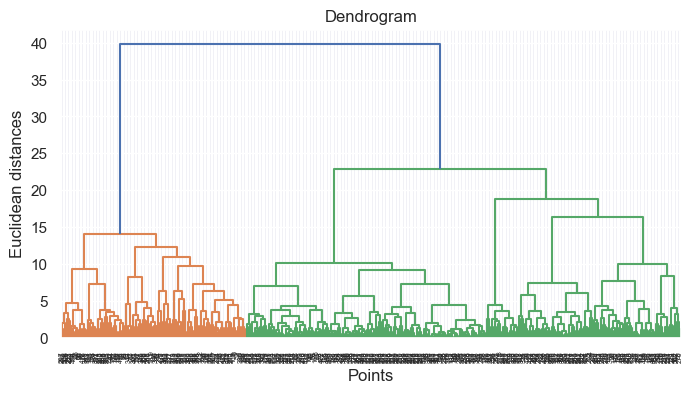

In [159]:
plot_dendrogram(transformed_df)

From the dendrogram, and using the largest vertical line approach, we can see that the optimal number of clusters is 2. These clusters, which are shown in the heatmap above have the same interpretation, as provided in the kmeans section

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [175]:
# Define a new pipeline with PCA
pipeline_with_pca = Pipeline([
    ('processor', full_pipeline),
    ('pca', PCA(n_components=None)), ])
pipeline_with_pca.fit(raw_df)

Pipeline(steps=[('processor',
                 Pipeline(steps=[('convert_categorical',
                                  ConvertToCategorical(column_names=['Channel',
                                                                     'Region'])),
                                 ('preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   ['Fresh',
                                                                    'Milk',
                                                                    'Grocery',
                                                                    'Frozen',
                                                                    'Detergents_Paper',
                                                                    'Delicassen']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoder',
                                                                                    OneHotEncoder(drop='first'))]),
                                                                   ['Channel',
                                                                    'Region'])]))])),
                ('pca', PCA())])

In [176]:
# Access the PCA step
pca = pipeline_with_pca.named_steps['pca']
# The components show which features contribute to each dimension
components = pca.components_

# The explained variance can show you how much variance is captured by each component
explained_variance = pca.explained_variance_ratio_
# Get the loadings (contribution of each feature to the components)
loadings = components.T * np.sqrt(explained_variance)

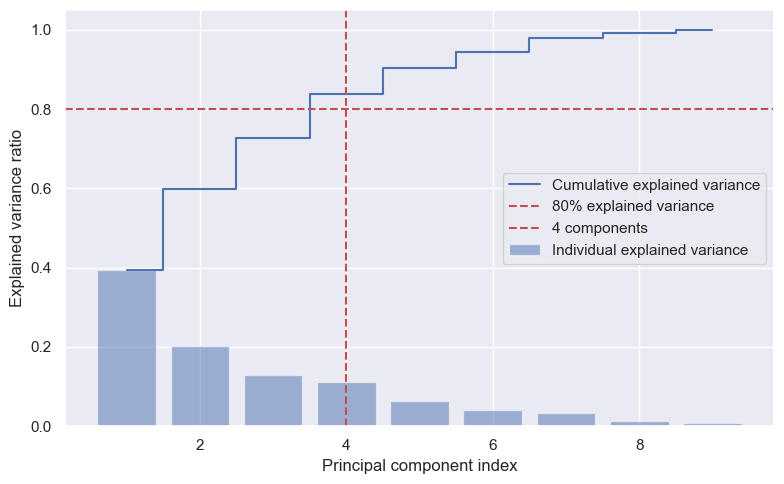

In [177]:
# Calculate the cumulative sum of the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Determine the number of components needed to explain the desired total variance
# For example, how many components are needed to explain at least 80% of the variance
n_components_80_percent = (cumulative_explained_variance < 0.80).sum() + 1

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(cumulative_explained_variance) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% explained variance')
plt.axvline(x=n_components_80_percent, color='r', linestyle='--', label=f'{n_components_80_percent} components')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

It is evident that 4 principal components are required to sufficiently the variance in the data (dimensionality)

Now, we will use the loading plot to examine the relative importance of the features when n_components=2 (feature selection)

In [193]:
pipeline_with_pca = Pipeline([
    ('processor', full_pipeline),
    ('pca', PCA(n_components=2)), ])
pipeline_with_pca.fit(raw_df)
# Access the PCA step
pca = pipeline_with_pca.named_steps['pca']
# The components show which features contribute to each dimension
components = pca.components_

# The explained variance can show you how much variance is captured by each component
explained_variance = pca.explained_variance_ratio_
# Get the loadings (contribution of each feature to the components)
loadings = components.T * np.sqrt(explained_variance)
df_with_pca = pipeline_with_pca.transform(raw_df)

In [180]:
loadings.shape

(9, 2)

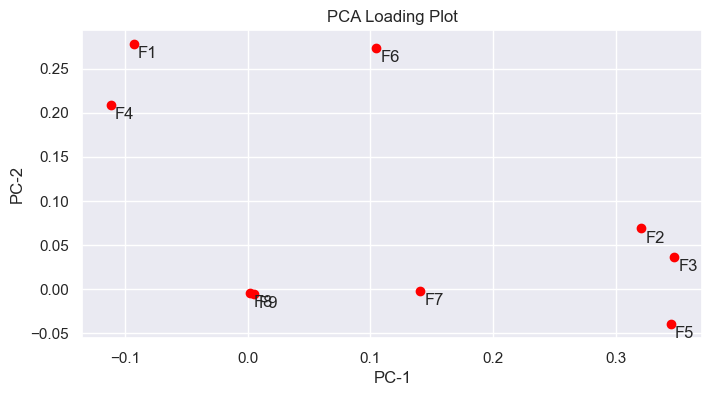

In [181]:
plt.figure(figsize=(8, 4))
plt.scatter(loadings[:, 0], loadings[:, 1], color='red')
for i, txt in enumerate(['F1', 'F2', 'F3', 'F4','F5','F6','F7','F8','F9']):
    plt.annotate(txt, (loadings[i, 0], loadings[i, 1]), textcoords="offset points", xytext=(10,-10), ha='center')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.title('PCA Loading Plot')
plt.grid(True)
plt.show()

In [183]:
# Recall the feature names
feature_names

['Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen',
 'Channel_2',
 'Region_2',
 'Region_3']

It is evident from the loading plots that the categorical features, `Region` and `Channel`, do not really contribute too much in explaining the overall variance in the dataset.

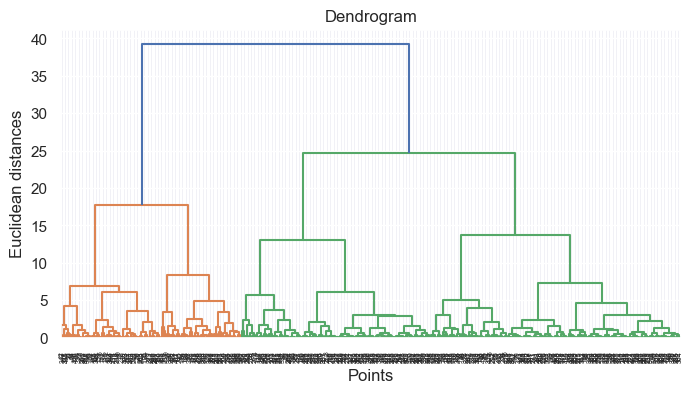

In [194]:
plot_dendrogram(df_with_pca)

It might be interesting to consider if using PCA being agglomerative clustering by change the clustering of the datapoints. This is shown with the help of the dendrogram above. However, it remains evident that there are two major clusters in the dataset

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

* Overall, there are two main clusters in segmenting the clients for the wholesale datasets. The first cluster prefers mostly `Fresh` produce and the other cluster being more balanced but also favouring the `Milk`,`Grocery`, and `Detergents_Paper` products.
* If more granularity is sort, at the expense of greater complexity, then, using the elbow method, we can partition the clientele into five sub-clusters. These clusters are described below.
* Cluster 0 is distinguished by a significantly higher purchase volume in `Fresh`, indicating these clients likely prioritize fresh produce.
* Cluster 1 features the most diverse set of purchases with relatively high sales in `Milk`, `Grocery`, and `Detergents_Paper`, suggesting these clients may be small retailers or grocery stores.
* Cluster 2 has moderate purchasing volumes across most product categories but is notably less for `Fresh` and `Frozen`, possibly representing smaller households or clients with limited storage.
* Cluster 3 shows a preference for `Frozen` products and relatively lower median sales in other categories, which might indicate clients like cafes or small eateries that use more frozen goods.
* Cluster 4 has the lowest median sales across all product categories, which could imply these are clients with low purchasing volumes, such as small, independent buyers.